In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d
import os
from scipy.signal import convolve2d as conv2
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import utils
#COLOR = 'white'
#mpl.rcParams['text.color'] = COLOR
#mpl.rcParams['axes.labelcolor'] = COLOR
#mpl.rcParams['xtick.color'] = COLOR
#mpl.rcParams['ytick.color'] = COLOR
import systems

In [2]:
def perp_plane(pnt,rot,delta=0.1,N=10):
    N = N//2
    g=np.stack(np.meshgrid(0,np.arange(-N,N),np.arange(-N,N))) #yes, the order is really, really weird. Thanks numpy
    q = np.einsum('ij,jlkm->ilkm',rot.T,g)[:,:,0,:] #transposed because we are going from g to f, squeezing
    q = delta*q+np.expand_dims(np.expand_dims(pnt,axis=1),axis=1) #dumping the flatness, shifting to the main point
    return q
class rot_keeper(object):
    def __init__(self,d=3):
        assert(d>2)
        self.d=d
        self.e1 = np.zeros(d)
        self.e1[0]=1.0
        self.e1_sm = np.zeros(d-1)
        self.e1_sm[0]=1.0
        self.e2 = np.zeros(d)
        self.e2[1]=1.0
        self.R = np.eye(d)

    def get_rot(self,u):
        Rs = utils.rot_mat(u,self.e1)
        e2old = self.R.T@self.e2
        Rpp = np.eye(self.d)
        Rpp[1:,1:] = utils.rot_mat((Rs@e2old)[1:],self.e1_sm)
        Rs = Rpp @ Rs
        self.R = Rs
        return Rs


<IPython.core.display.Javascript object>


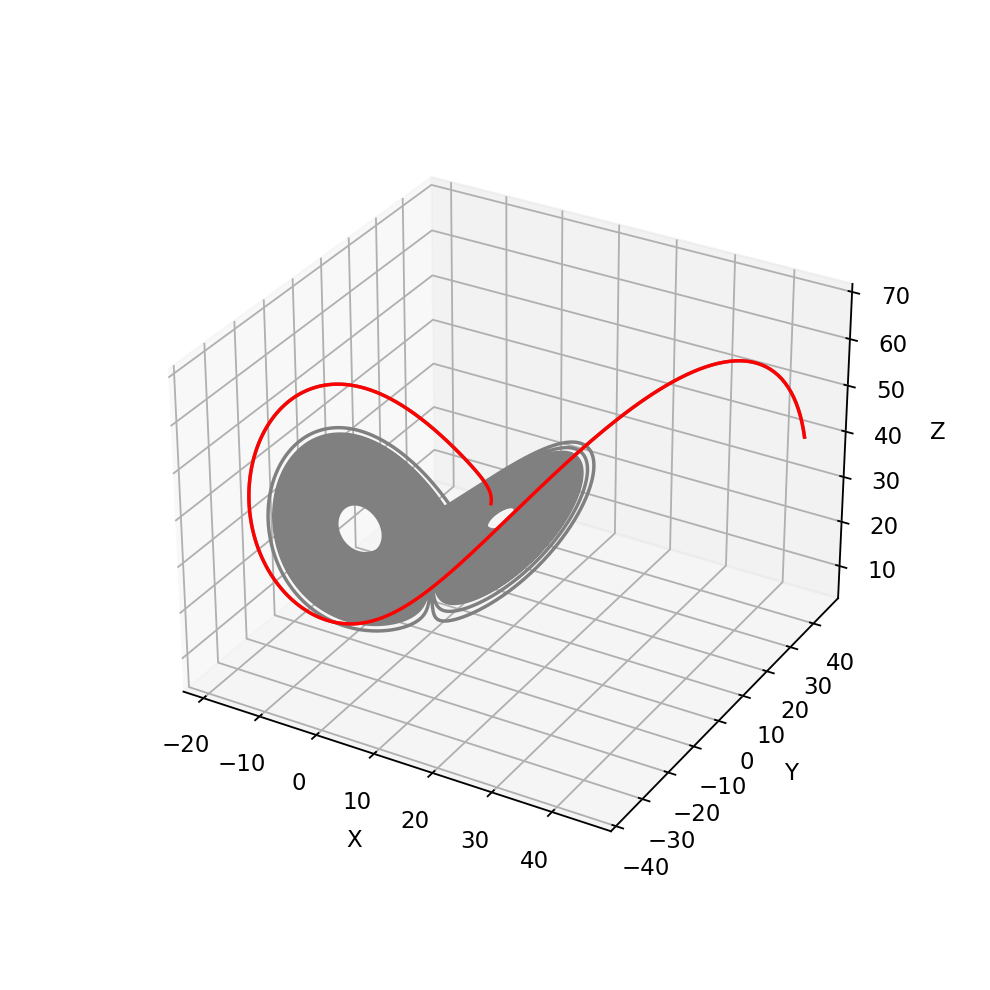

Text(0.5, 0, 'Z')

In [4]:
count = 500
dt = 0.001
T = 150
t = np.arange(0, T, dt)
a0 = np.array([45,45,40])
fi = lambda x,t: systems.lorentz(t,x)
xi = odeint(fi, a0, t)
fig = plt.figure(figsize=[6,6])
ax = plt.axes(projection='3d')
ax.plot3D(xi[:,0], xi[:,1], xi[:,2], 'gray')
ax.plot3D(xi[:count,0], xi[:count,1], xi[:count,2], 'red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


In [5]:
N=10
rotation_manager = rot_keeper(d=3)
ds = fi(xi[0],0)
rot = rotation_manager.get_rot(ds)
pi = perp_plane(xi[0],rot,delta = 1,N=N)


<IPython.core.display.Javascript object>


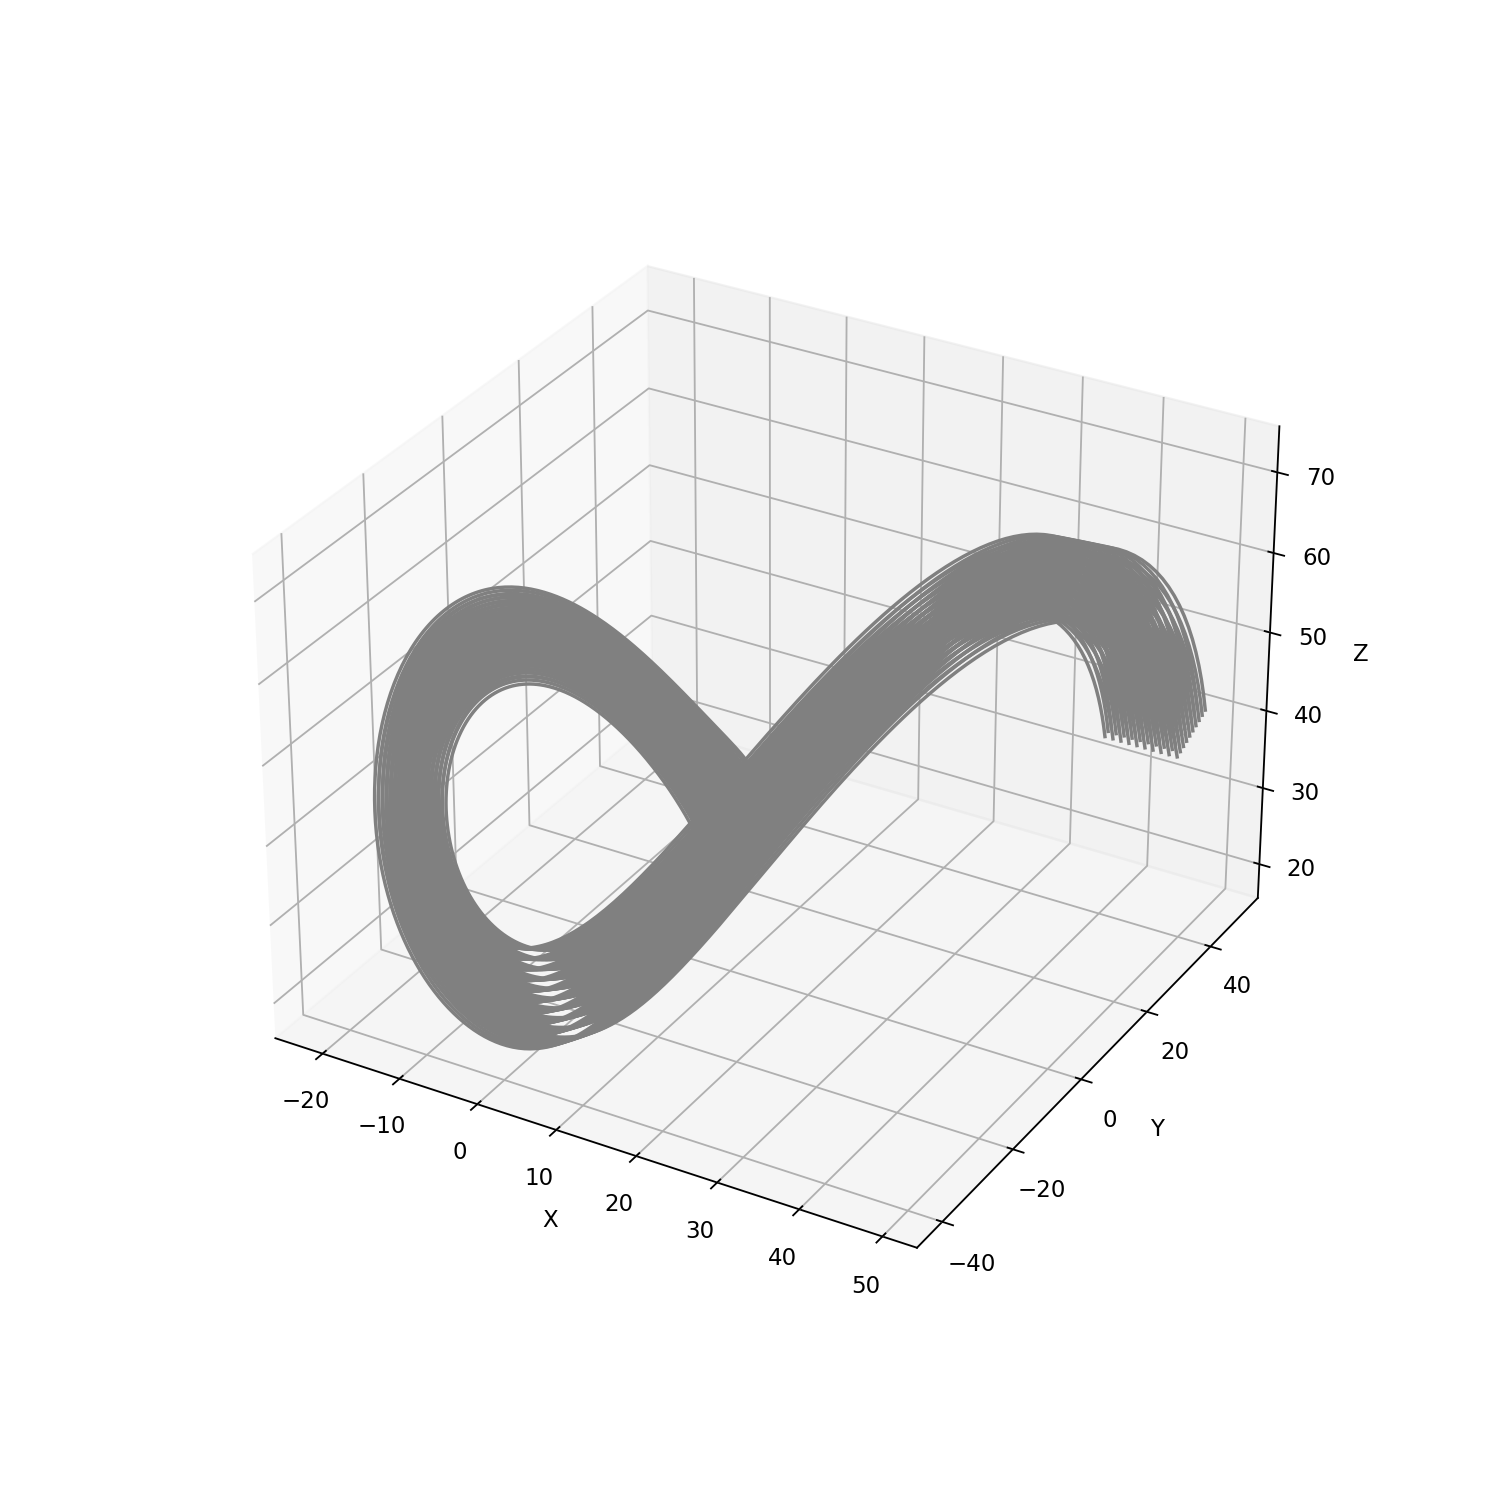

In [6]:
paths=np.zeros([3,count,N,N])
tp = np.arange(0, count*dt, dt)
fig = plt.figure(figsize=[9,9])
ax = plt.axes(projection='3d')
for q in range(N):
    for w in range(N):
        paths[:,:,q,w] = odeint(fi, pi[:,q,w], tp).T
        ax.plot3D(paths[0,:,q,w], paths[1,:,q,w], paths[2,:,q,w], 'gray')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [7]:
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<IPython.core.display.Javascript object>


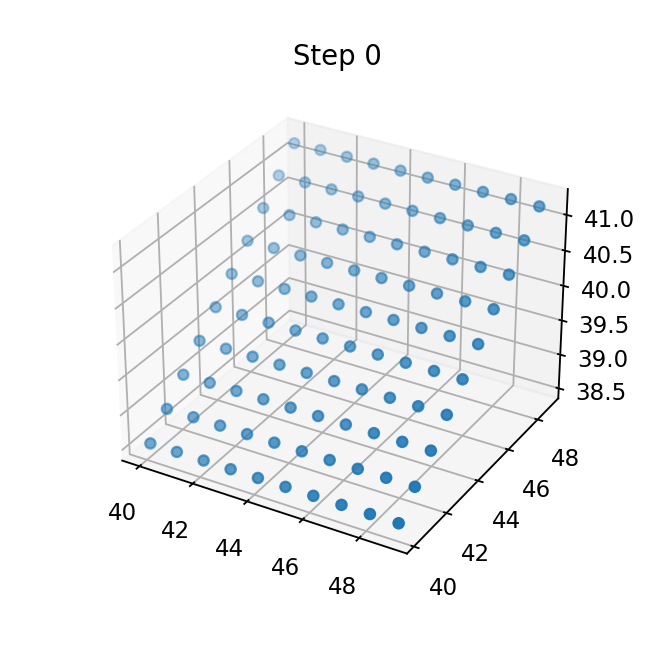

<IPython.core.display.Javascript object>


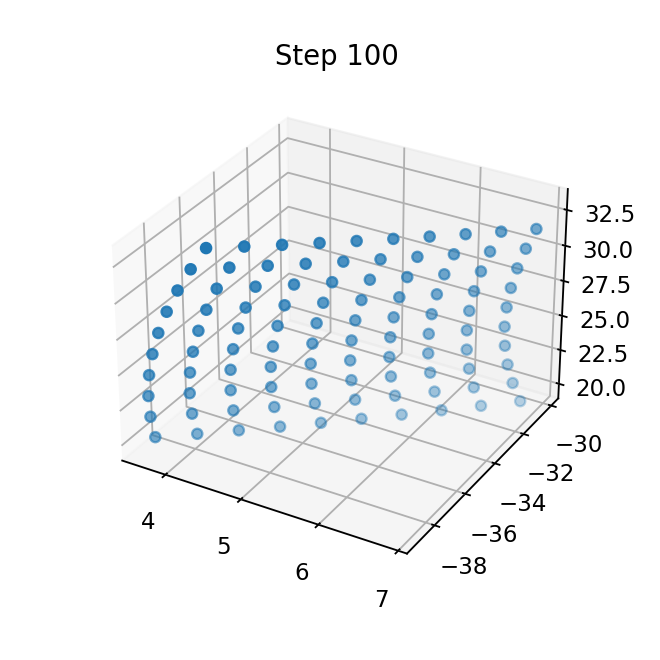

<IPython.core.display.Javascript object>


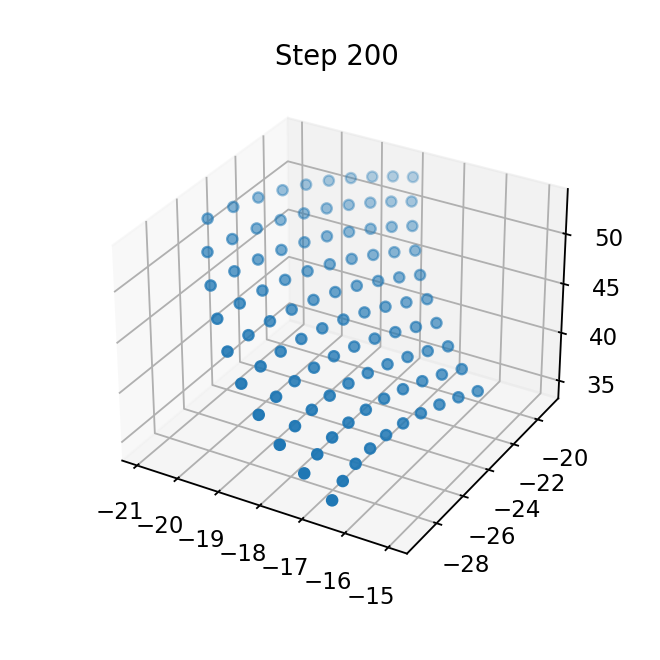

<IPython.core.display.Javascript object>


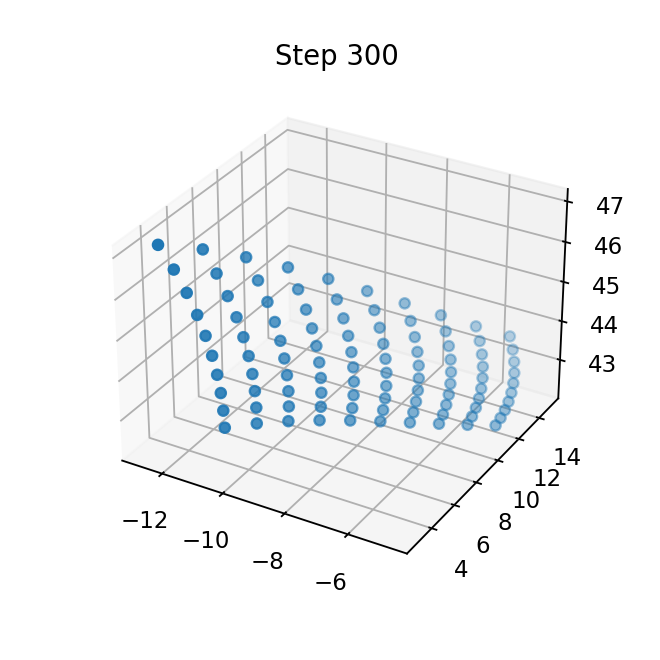

<IPython.core.display.Javascript object>


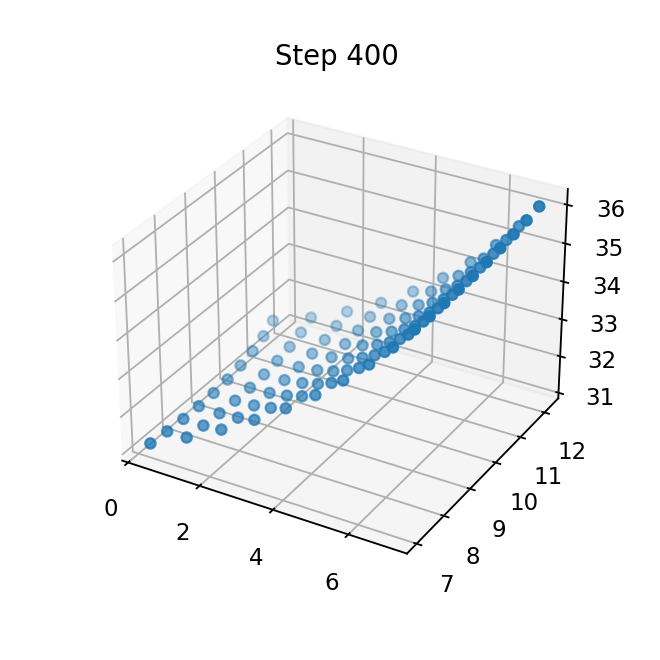

In [8]:
for ind in range(0,500,100):
    fig = plt.figure(figsize=[4,4])
    ax = plt.axes(projection='3d')
    ax.scatter3D(paths[0,ind,:,:],paths[1,ind,:,:],paths[2,ind,:,:])
    plt.title(f'Step {ind}')
    plt.show()


In [49]:
pi.shape

(3, 10, 10)

In [73]:
len(np.zeros((3,3)))

3

<IPython.core.display.Javascript object>


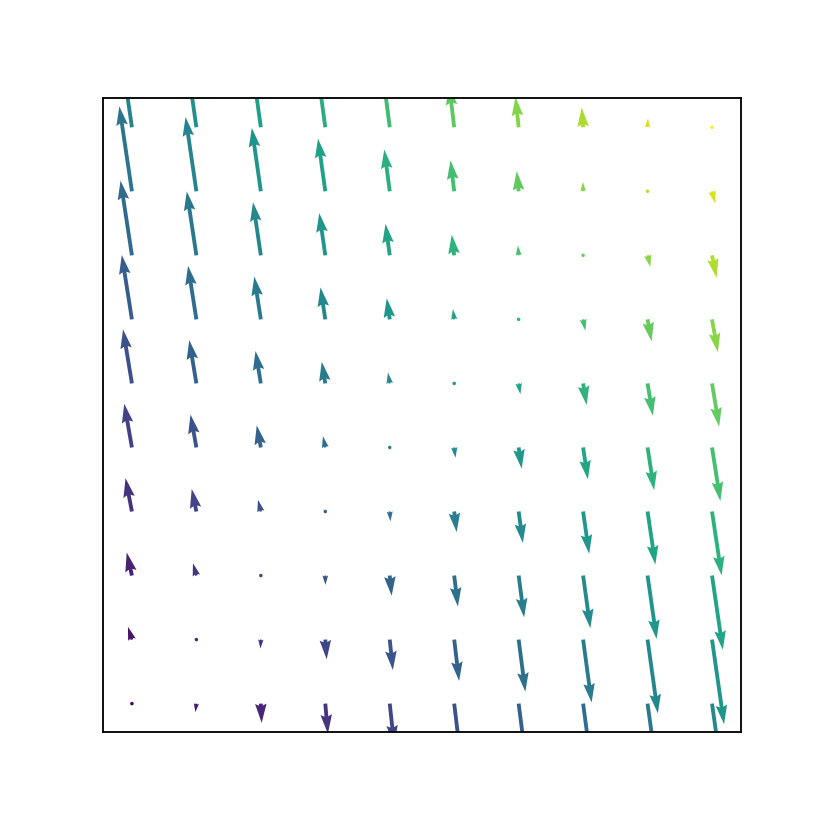

<IPython.core.display.Javascript object>


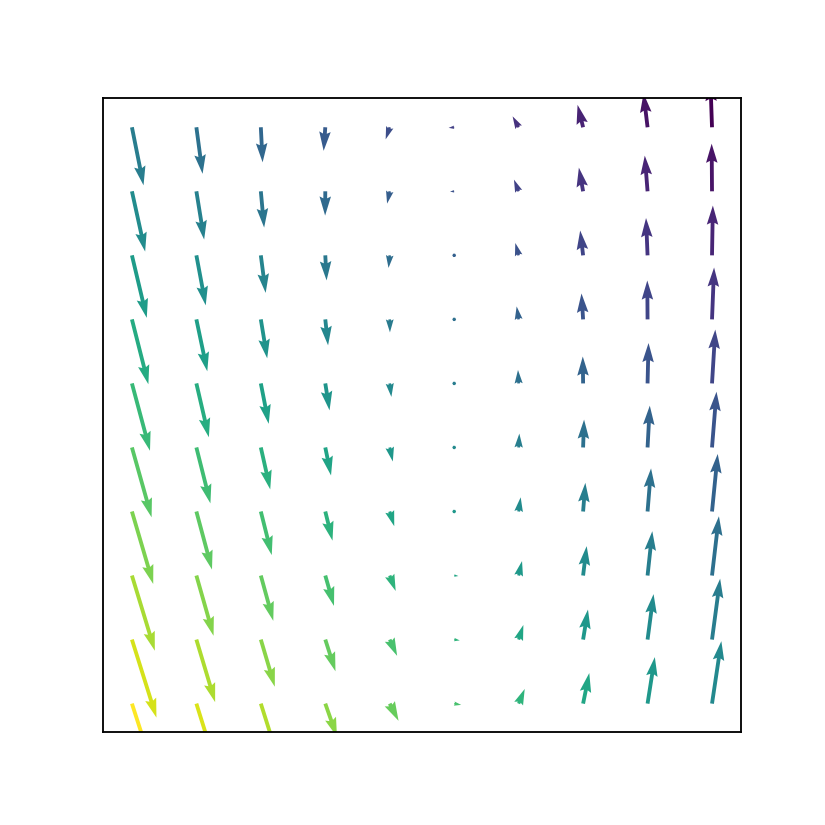

<IPython.core.display.Javascript object>


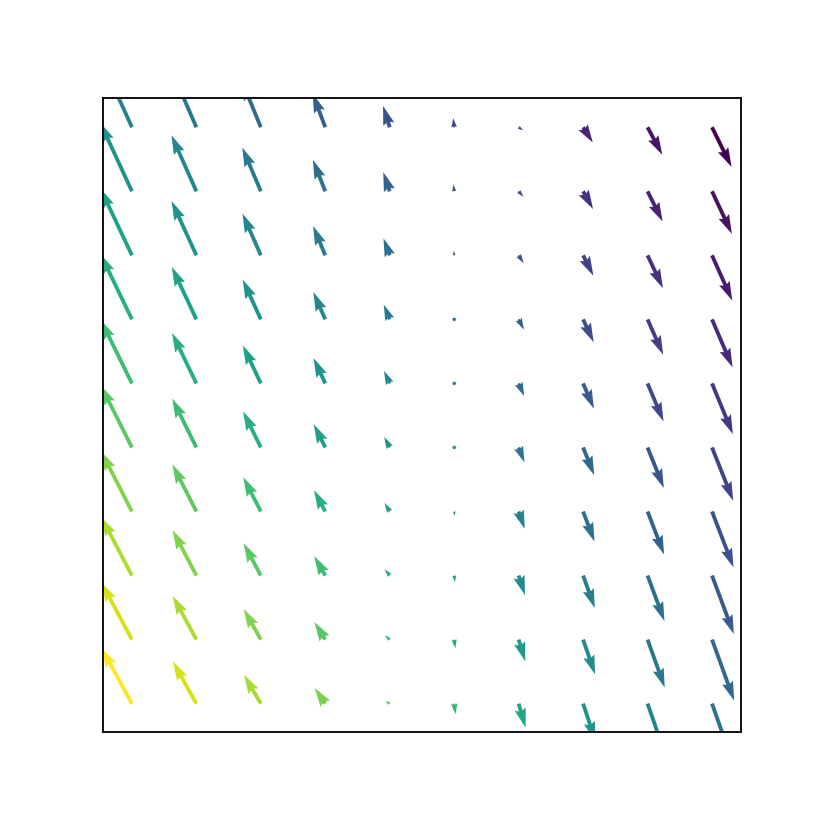

<IPython.core.display.Javascript object>


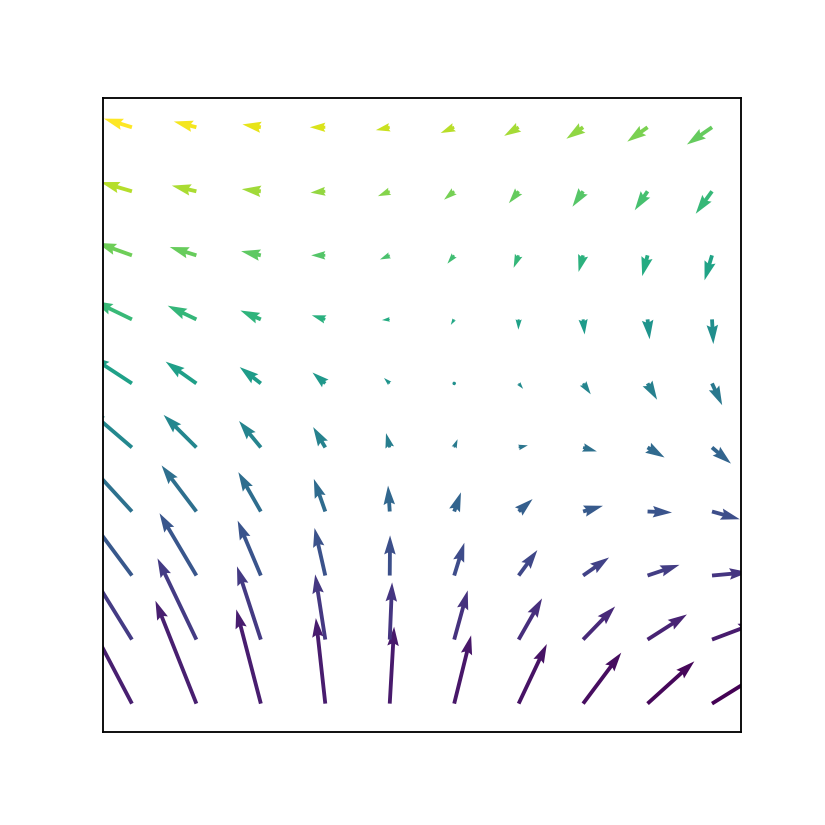

<IPython.core.display.Javascript object>


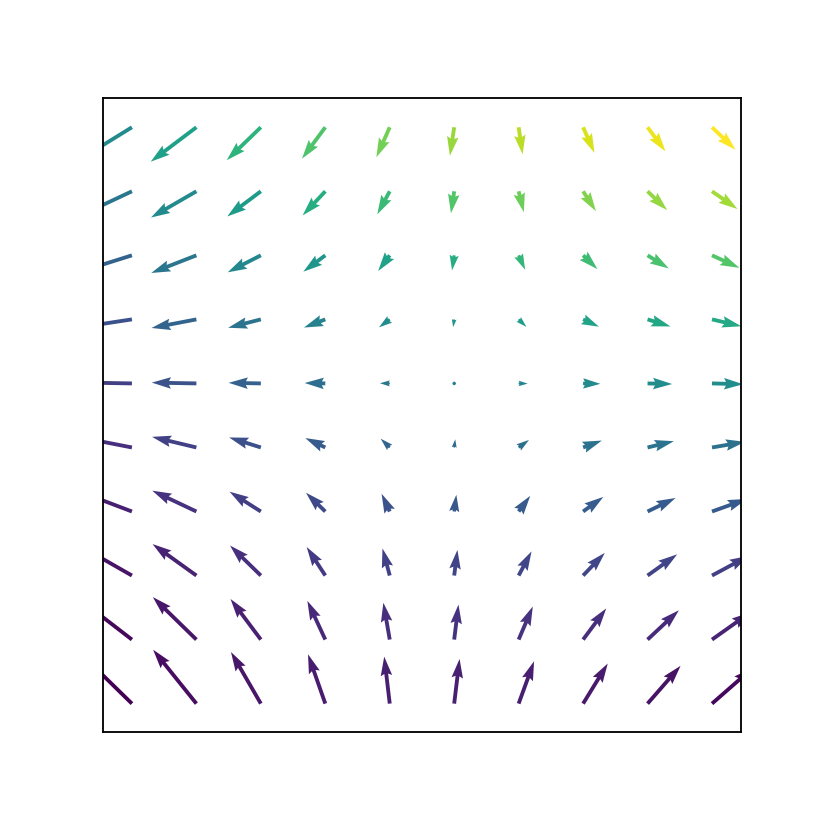

In [14]:
M=30
q=3
rotation_manager = rot_keeper(d=3)
for ind in range(0,500,100):
    ds = fi(xi[ind],0)
    fii = lambda x: fi(x,0)
    rot = rotation_manager.get_rot(ds)
    pi = perp_plane(xi[ind],rot,delta = 1/3.0,N=M)
    planeg = np.apply_along_axis(fii,0,pi)
    planeg = np.einsum('ij,jkl->ikl',rot,planeg)
    xm,ym = np.meshgrid(np.arange(M),np.arange(M))
    plt.figure(figsize=[5,5])
    plt.quiver(xm[::q,::q],ym[::q,::q],30*planeg[1,::q,::q],30*planeg[2,::q,::q],planeg[0,::q,::q])
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.show()


In [ ]:
T = 1000;
DT=0.001;
substeps=2;
x0 = pnts[:,0]
llorentz = lambda x: lorentz(0,x)
X, allBasisG, allRGs, allJacobian,allGecobian,allExpansionRatesG,shortTimeLyap, allRots, LyapExp = local_CLLV(T,llorentz,Dlorentz,x0,DT,substeps,transient=0,shorttime=5)
